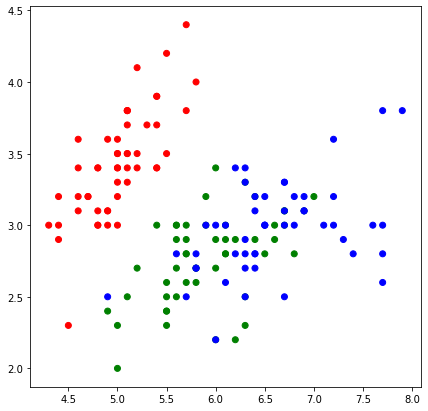

Точность алгоритма при k = 1: 0.667


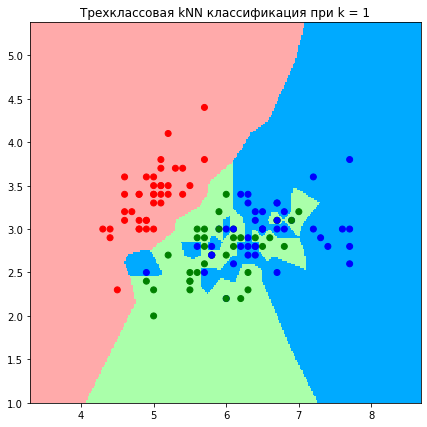

Точность алгоритма при k = 3: 0.733


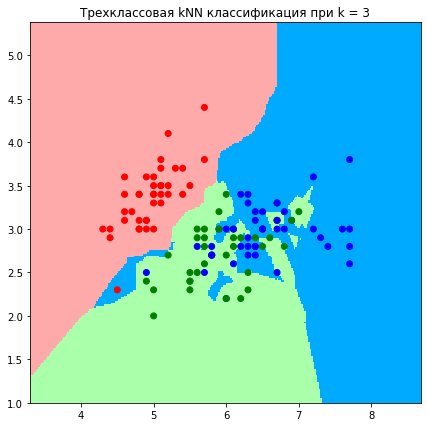

Точность алгоритма при k = 5: 0.867


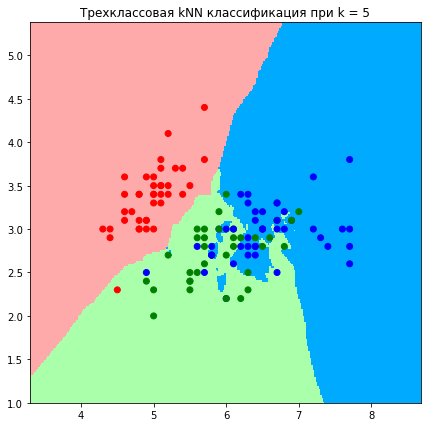

Точность алгоритма при k = 10: 0.833


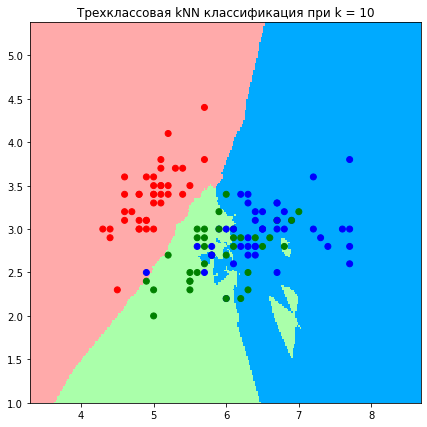

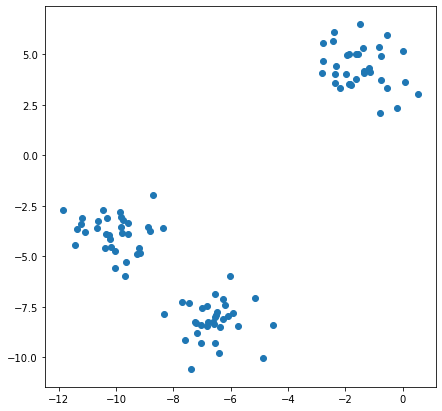

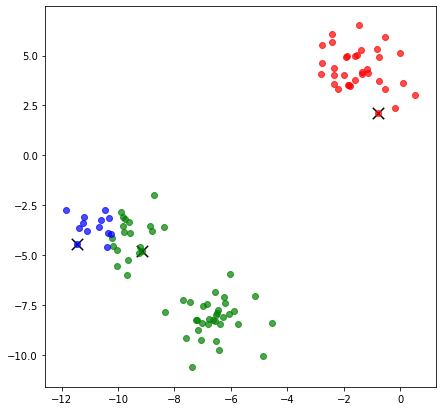

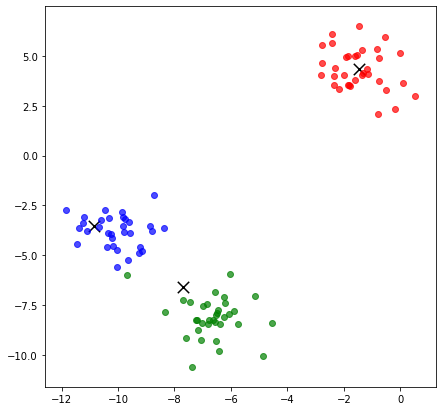

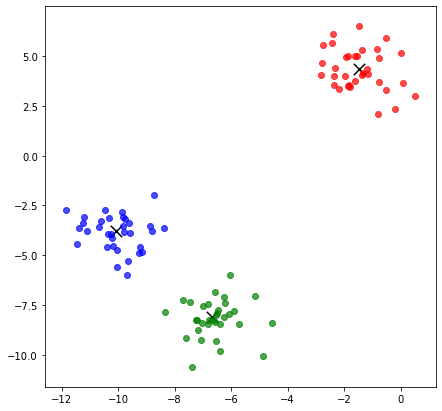

stop: 3


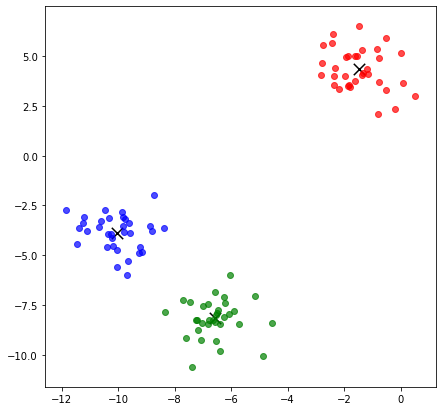

In [1]:
%run ./Lesson_7_280622.ipynb

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [2]:
def knn(x_train, y_train, x_test, k, w_func):
    """алгоритм поиска k ближайших соседей"""
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчёт расстояния от классифицируемого объекта до объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберём k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаём словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        weights = w_func(list(zip(*k_neighbours))[0])
        for d, w in zip(k_neighbours, weights):
            classes[d[1]] += w
            
        # записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [3]:
f1 = lambda ds: [1] * len(ds)
f2 = lambda ds: [1/(i+1) for i in range(len(ds))]
f3 = lambda ds: [1/(d+1e-3) for d in ds]

In [4]:
k = 5

y_pred = knn(X_train, y_train, X_test, k, f1)
print(f'Достоверность алгоритма при {k = }: {accuracy(y_pred, y_test):.3f}')

y_pred = knn(X_train, y_train, X_test, k, f2)
print(f'Достоверность алгоритма при {k = }: {accuracy(y_pred, y_test):.3f}')

y_pred = knn(X_train, y_train, X_test, k, f3)
print(f'Достоверность алгоритма при {k = }: {accuracy(y_pred, y_test):.3f}')

Достоверность алгоритма при k = 5: 0.867
Достоверность алгоритма при k = 5: 0.733
Достоверность алгоритма при k = 5: 0.833


In [5]:
def get_graph(X_train, y_train, k, w_func):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчёт пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, w_func)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трёхклассовая kNN классификация при {k = }")
    plt.show()

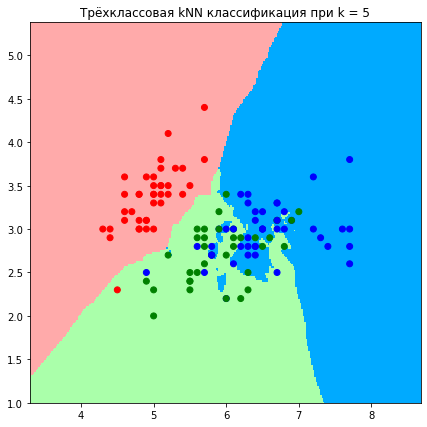

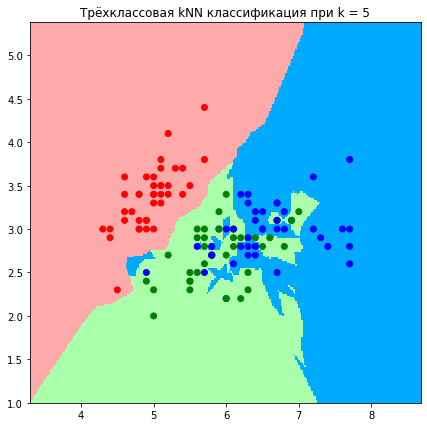

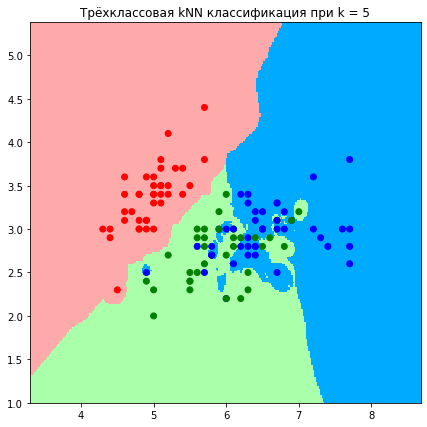

In [6]:
get_graph(X_train, y_train, k, f1)
get_graph(X_train, y_train, k, f2)
get_graph(X_train, y_train, k, f3)

2. (\*) Напишите функцию подсчёта метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).